# Importing imp lib

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [28]:
data=pd.read_csv(r"C:\Users\acer\Downloads\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Droping unusefull col.

In [29]:
df=data.drop(["PassengerId","Name","Embarked","Ticket","Cabin"],axis=1)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


# 2. Data Pre-Processing
#### a)Data Type and conversion
#### b)Identifying & Treatment Missing Value

#### 2.1. Data Type and conversion

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [33]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Dealing with missing values

In [35]:
df.Age.median()

28.0

In [36]:
df.Age.fillna(df.Age.median(),inplace=True)

In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Dealing with outliers

<AxesSubplot:>

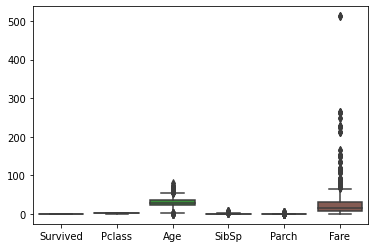

In [38]:
sns.boxplot(data=df)

In [39]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)
iqr=q3-q1
upperlimit=q3+1.5*iqr
print(upperlimit)
lowerlimit=q1-1.5*iqr
print(lowerlimit)

54.5
2.5


In [40]:
df["Age"]=np.where(df['Age'] > upperlimit,upperlimit,df['Age'])

In [41]:
df["Age"]=np.where(df['Age'] < lowerlimit,lowerlimit,df['Age'])

<AxesSubplot:ylabel='Age'>

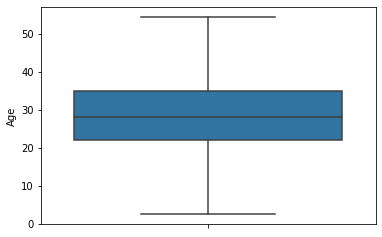

In [42]:
sns.boxplot(y="Age",data=df)

In [43]:
q1=df.SibSp.quantile(0.25)
q3=df.SibSp.quantile(0.75)
iqr=q3-q1
upperlimit=q3+1.5*iqr
print(upperlimit)
lowerlimit=q1-1.5*iqr
print(lowerlimit)

2.5
-1.5


In [44]:
df["SibSp"]=np.where(df['SibSp'] > upperlimit,upperlimit,df['SibSp'])

In [45]:
df["SibSp"]=np.where(df['SibSp'] < lowerlimit,lowerlimit,df['SibSp'])

<AxesSubplot:ylabel='SibSp'>

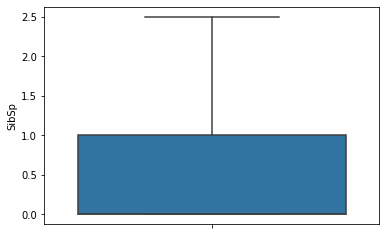

In [46]:
sns.boxplot(y="SibSp",data=df)

In [47]:
q1=df.Parch.quantile(0.25)
q3=df.Parch.quantile(0.75)
iqr=q3-q1
upperlimit=q3+1.5*iqr
print(upperlimit)
lowerlimit=q1-1.5*iqr
print(lowerlimit)

0.0
0.0


In [48]:
df["Parch"]=np.where(df['Parch'] > upperlimit,upperlimit,df['Parch'])

In [49]:
df["Parch"]=np.where(df['Parch'] < lowerlimit,lowerlimit,df['Parch'])

<AxesSubplot:ylabel='Parch'>

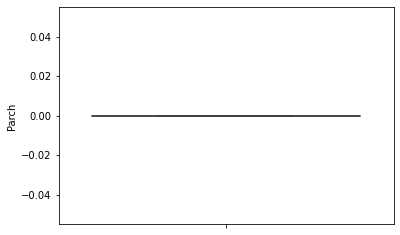

In [50]:
sns.boxplot(y="Parch",data=df)

In [51]:
q1=df.Fare.quantile(0.25)
q3=df.Fare.quantile(0.75)
iqr=q3-q1
upperlimit=q3+1.5*iqr
print(upperlimit)
lowerlimit=q1-1.5*iqr
print(lowerlimit)

65.6344
-26.724


In [52]:
df["Fare"]=np.where(df['Fare'] > upperlimit,upperlimit,df['Fare'])

In [53]:
df["Fare"]=np.where(df['Fare'] < lowerlimit,lowerlimit,df['Fare'])

<AxesSubplot:ylabel='Fare'>

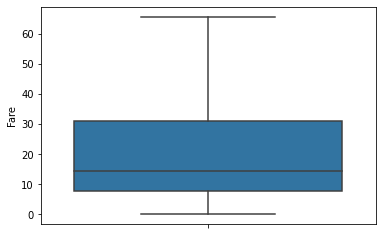

In [54]:
sns.boxplot(y="Fare",data=df)

<AxesSubplot:>

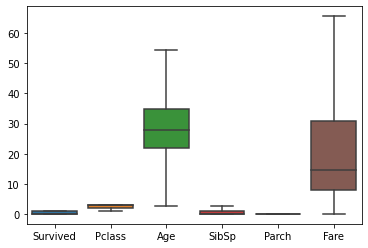

In [55]:
sns.boxplot(data=df)

## Data Visualization

In [56]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 0 = Not-Survived
#### 1 = Survived

In [57]:
(342/891)*100  ### 38% survived

38.38383838383838

#### Out of 891 passengers, 38% passengers was survived

In [71]:
import plotly.express as px

fig = px.pie(df,names="Survived",color='Survived',
             color_discrete_map={0:'red',
                                 1:'green'})
fig.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

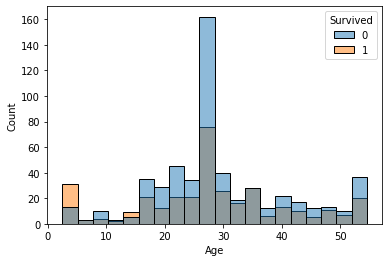

In [72]:
sns.histplot(x="Age", data= df, hue="Survived")

#### we can see that the number of children survived is more than older people

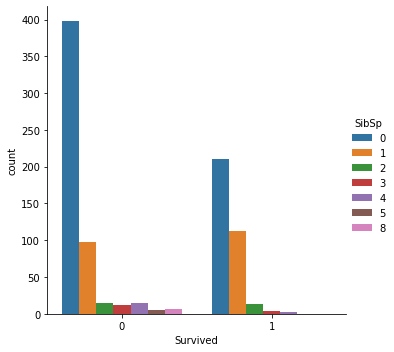

In [74]:
sns.catplot(x="Survived", kind= "count", hue="SibSp", data=data)

#### the more the people have siblings the less chance they have to survive

# Data Partition

In [82]:
from sklearn.preprocessing import LabelEncoder
df1=df.apply(LabelEncoder().fit_transform) # label in ascending order
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,22,1,0,18
1,1,0,0,45,1,0,203
2,1,2,0,28,0,0,41
3,1,0,0,41,1,0,189
4,0,2,1,41,0,0,43


In [83]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df1.drop('Survived', axis = 1)
Y = df1[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [84]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,2,1,22,1,0,18
1,0,0,45,1,0,203
2,2,0,28,0,0,41
3,0,0,41,1,0,189
4,2,1,41,0,0,43
...,...,...,...,...,...,...
886,1,1,29,0,0,85
887,0,0,18,0,0,153
888,2,0,30,1,0,131
889,0,1,28,0,0,153


In [85]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [86]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
226,1,1,18,0,0,72,1
278,2,1,5,3,0,151,0
31,0,0,30,1,0,203,1
449,0,1,61,0,0,155,1
632,0,1,36,0,0,155,1


# Logistics Regression

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model = output

In [88]:
output.intercept_

array([3.23762551])

In [89]:
output.coef_

array([[-1.06076734, -2.36667142, -0.03176884, -0.43346255,  0.        ,
         0.00289777]])

In [90]:
output.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype=object)

# Predictions on Train Dataset

In [91]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
226,1,1,18,0,0,72,1
278,2,1,5,3,0,151,0
31,0,0,30,1,0,203,1
449,0,1,61,0,0,155,1
632,0,1,36,0,0,155,1


In [92]:
train['Predicted']=output.predict(X_train) ##predict_prob
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Predicted
226,1,1,18,0,0,72,1,0
278,2,1,5,3,0,151,0,0
31,0,0,30,1,0,203,1,1
449,0,1,61,0,0,155,1,0
632,0,1,36,0,0,155,1,1


# Model Performance Metrics

In [93]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Survived'])
matrix

array([[364,  79],
       [ 69, 200]], dtype=int64)

In [94]:
Accuracy_Train=((364+200)/(712)*100)
print(Accuracy_Train)

79.21348314606742


#### Accuracy of Model is 79% , So we say Model good fit data

In [95]:
from sklearn.metrics import classification_report
print(classification_report(train['Survived'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       433
           1       0.74      0.72      0.73       279

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



#### Accuracy of Model is 79%,Hence Model is good Fit
#### Accuracy of Bad Customer Capture by Model is 72% ( Sensitivity )
#### Accuracy of Good Customer Capture by Model is 84% (Specificity)

# Predictions on Test Dataset

In [96]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
665,1,1,36,2,0,203,0
336,0,1,32,1,0,203,0
524,2,1,30,0,0,17,0
635,1,0,30,0,0,85,1
452,0,1,33,0,0,146,0


In [97]:
test['Predicted']=output.predict(X_test)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Predicted
665,1,1,36,2,0,203,0,0
336,0,1,32,1,0,203,0,1
524,2,1,30,0,0,17,0,0
635,1,0,30,0,0,85,1,1
452,0,1,33,0,0,146,0,1


# Model Performance Metrics on Test data

In [98]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Survived'])
print(matrix)

[[99 14]
 [17 49]]


In [99]:
Accuracy_test=((99+49)/(179)*100)
Accuracy_test

82.68156424581005

In [100]:
from sklearn.metrics import classification_report
print(classification_report(test['Survived'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       116
           1       0.74      0.78      0.76        63

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



#### Accuracy of Model is 83%,Hence Model is good Fit
#### Accuracy of Bad Customer Capture by Model is 78% ( Sensitivity )
#### Accuracy of Good Customer Capture by Model is 85%

# Coefficient

In [101]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,3.237626


In [102]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient'])
abc

,Coefficient
Pclass,-1.060767
Sex,-2.366671
Age,-0.031769
SibSp,-0.433463
Parch,0.000000
Fare,0.002898


In [103]:
Model_Values.append(abc)

,Coefficient
Intercept,3.237626
Pclass,-1.060767
Sex,-2.366671
Age,-0.031769
SibSp,-0.433463
Parch,0.000000
Fare,0.002898


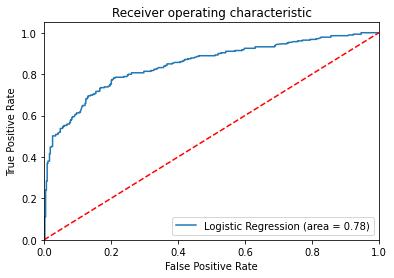

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()